c:\Users\sunwoong\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


level_to                    2    3    4    5    6    7    8    9   10   11  \
player_slug                                                                  
2021-10-31T16:01:57.631Z  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2021-10-31T23:13:52.512Z  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2021-11-01T00:29:22.357Z  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2021-11-01T03:34:17.980Z  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2021-11-01T05:12:15.383Z  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

level_to                  ...  275  276  277  278  279  280  281  282  283  \
player_slug               ...                                                
2021-10-31T16:01:57.631Z  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2021-10-31T23:13:52.512Z  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2021-11-01T00:29:22.357Z  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2021-11-01T03:34:17.980Z  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.

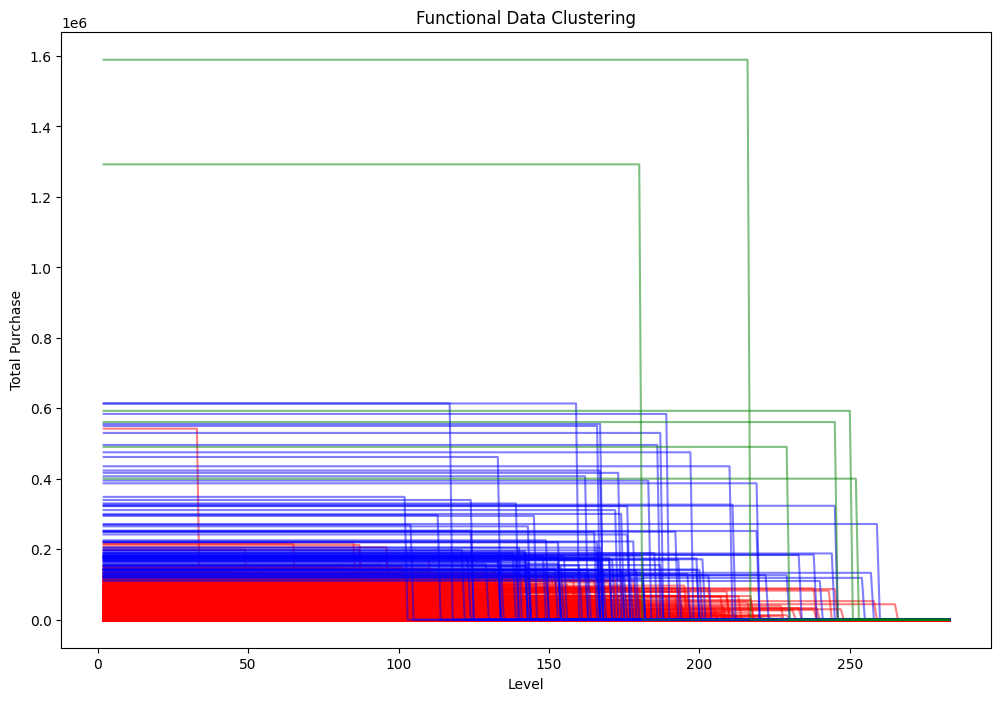

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 데이터 로드
data = pd.read_csv('levelups_panel_20240722.csv')

# 데이터 피벗: player_slug를 행으로, level_to를 열로, total_purchase를 값으로 설정
pivot_data = data.pivot(index='player_slug', columns='level_to', values='total_purchase').fillna(0)

# 데이터를 numpy 배열로 변환
X = pivot_data.values

# 데이터 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# k-평균 군집화 수행 (예: k = 3)
kmeans = KMeans(n_clusters=3, random_state=123)
clusters = kmeans.fit_predict(X_scaled)

# 군집화 결과를 pivot_data에 추가
pivot_data['cluster'] = clusters

# 군집화 결과 출력
print(pivot_data.head())

# 군집화 결과 시각화
plt.figure(figsize=(12, 8))

# 각 클러스터별로 다른 색으로 시각화
colors = ['red', 'blue', 'green']
for cluster in np.unique(clusters):
    cluster_data = pivot_data[pivot_data['cluster'] == cluster].iloc[:, :-1].T
    plt.plot(cluster_data, color=colors[cluster], alpha=0.5, label=f'Cluster {cluster}')

plt.xlabel('Level')
plt.ylabel('Total Purchase')
plt.title('Functional Data Clustering')

plt.show()

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import skfda
from skfda.representation.grid import FDataGrid
from skfda.preprocessing.dim_reduction.feature_extraction import FPCA

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tqdm import tqdm
from scipy.optimize import minimize
from skfda import FDataGrid
from skfda.preprocessing.smoothing import BasisSmoother
from skfda.representation.basis import FourierBasis
from skfda.exploratory.visualization import FPCAPlot
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from skfda.preprocessing.dim_reduction.feature_extraction import FPCA
from joblib import Parallel, delayed
from tqdm import tqdm

In [22]:
data = pd.read_csv('levelups_panel_20240722.csv')
data = data[data['level_to'] <= 100]
focal_data=data[['level_to','player_slug','total_purchase','total_ad','interval','highest_level','binge','first_session_level',
                 'ad_item','ad_revival','purchase','playtime_boss','playtime_dungeon','playtime_tower','playtime_pvp',
                 'playtime_farm','playtime_survival']]

In [27]:
# Filter only numerical columns
numerical_focal_data = focal_data.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numerical_focal_data.corr()

# Extract the correlation of 'purchase' with other columns
purchase_correlation = correlation_matrix['purchase']

# Display the correlation values
print(purchase_correlation)

level_to               0.006644
total_purchase         0.149577
total_ad              -0.002024
interval               0.015968
highest_level          0.022026
binge                  0.004689
first_session_level    0.011703
ad_item                0.003073
ad_revival             0.001033
purchase               1.000000
playtime_boss          0.006446
playtime_dungeon       0.007155
playtime_tower         0.007894
playtime_pvp           0.007631
playtime_farm          0.005767
playtime_survival      0.010735
Name: purchase, dtype: float64


In [24]:
focal_data[focal_data['purchase']!=0]

,level_to,player_slug,total_purchase,total_ad,interval,highest_level,binge,first_session_level,ad_item,ad_revival,purchase,playtime_boss,playtime_dungeon,playtime_tower,playtime_pvp,playtime_farm,playtime_survival
1091,9,2021-11-01T12:48:42.128Z,3300.0,1.0,0.034722,99,0,68,0.0,0.0,3300.0,0.0,0.0,0.0,0.0,0.0,0.0
1340,13,2021-11-01T13:52:32.587Z,19800.0,0.0,0.034722,79,0,11,0.0,0.0,9900.0,0.0,0.0,0.0,0.0,0.0,0.0
1342,15,2021-11-01T13:52:32.587Z,19800.0,0.0,0.029167,79,0,11,0.0,0.0,9900.0,0.0,0.0,0.0,0.0,0.0,0.0
2002,62,2021-11-01T15:10:02.121Z,3300.0,2.0,0.326111,115,1,8,0.0,0.0,3300.0,0.0,0.0,0.0,0.0,0.0,0.0
2576,12,2021-11-01T19:58:43.096Z,3300.0,6.0,0.066389,102,0,85,0.0,0.0,3300.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2465706,9,2022-03-29T07:51:25.065Z,36300.0,0.0,0.029167,17,0,17,0.0,0.0,3300.0,0.0,0.0,0.0,0.0,0.0,0.0
2465712,15,2022-03-29T07:51:25.065Z,36300.0,0.0,0.087500,17,0,17,0.0,0.0,33000.0,0.0,0.0,0.0,0.0,0.0,0.0
2466245,10,2022-03-30T05:37:49.026Z,49500.0,0.0,0.101111,30,1,21,0.0,0.0,23100.0,0.0,0.0,0.0,0.0,0.0,0.0
2466260,25,2022-03-30T05:37:49.026Z,49500.0,0.0,0.062944,30,1,21,0.0,0.0,26400.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
# 데이터 피벗: player_slug를 행으로, level_to를 열로, total_purchase를 값으로 설정
pivot_data = focal_data.pivot(index='player_slug', columns='level_to', values='purchase').fillna(0)
pivot_data

level_to,2,3,4,5,6,7,8,9,10,11,...,91,92,93,94,95,96,97,98,99,100
player_slug,,,,,,,,,,,,,,,,,,,,,
2021-10-31T16:01:57.631Z,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-10-31T23:13:52.512Z,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-11-01T00:29:22.357Z,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-11-01T03:34:17.980Z,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-11-01T05:12:15.383Z,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-30T13:53:30.032Z,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-03-30T14:09:03.502Z,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-03-30T14:13:23.546Z,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
# 데이터를 numpy 배열로 변환
X = pivot_data.values
time_points = pivot_data.columns.astype(float)
# 기능적 데이터 객체 생성
fd = FDataGrid(data_matrix=X, grid_points=time_points)


In [14]:
basis = FourierBasis(domain_range=(min(time_points), max(time_points)), n_basis=5)
smoother = BasisSmoother(basis)
fd_smooth = smoother.fit_transform(fd)
# 데이터 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(fd_smooth.data_matrix.reshape(fd_smooth.data_matrix.shape[0], -1)).reshape(fd_smooth.data_matrix.shape)
fd_scaled = skfda.FDataGrid(data_matrix=X_scaled, grid_points=fd_smooth.grid_points)

# FPCA를 사용하여 데이터 차원 축소
fpca = FPCA(n_components=3)
fd_reduced = fpca.fit_transform(fd_scaled)

# k-평균 군집화 수행 (예: k = 3)
kmeans = KMeans(n_clusters=3, random_state=123)
clusters = kmeans.fit_predict(fd_reduced)
pivot_data['cluster'] = clusters



c:\Users\sunwoong\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


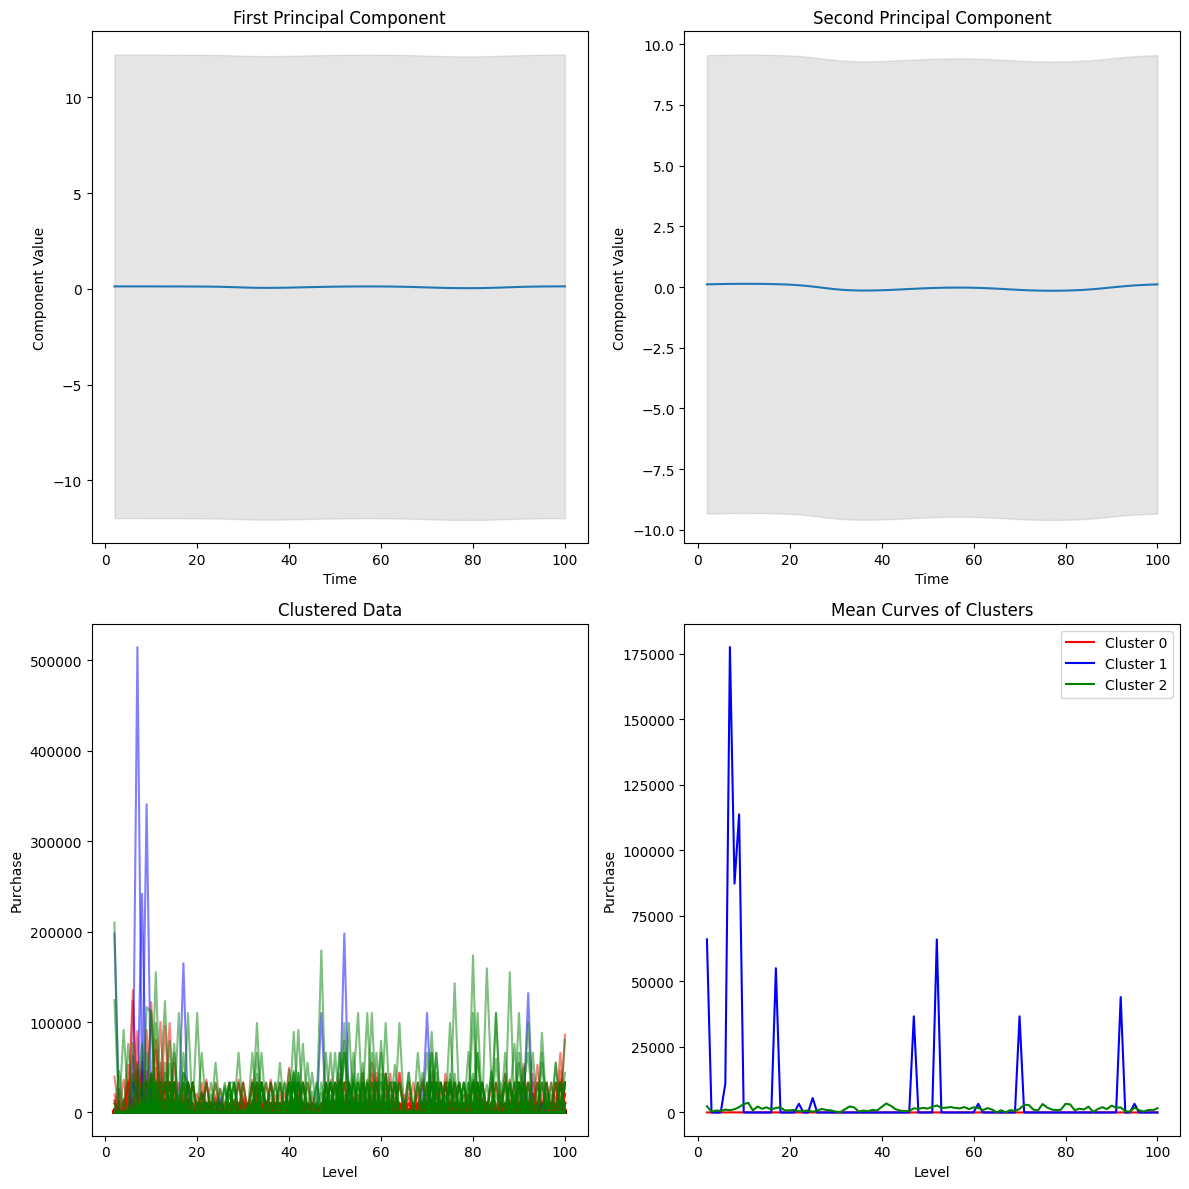

In [21]:
from skfda.preprocessing.dim_reduction.feature_extraction import FPCA
from skfda.exploratory.visualization import FPCAPlot
# FPCA 성분 시각화
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# 첫 번째 주성분 시각화
axs[0, 0].plot(fd.grid_points[0], fpca.components_.data_matrix[0])
axs[0, 0].fill_between(fd.grid_points[0], 
                       (fpca.components_.data_matrix[0] - 2*np.sqrt(fpca.explained_variance_[0])).ravel(),
                       (fpca.components_.data_matrix[0] + 2*np.sqrt(fpca.explained_variance_[0])).ravel(),
                       color='gray', alpha=0.2)
axs[0, 0].set_title("First Principal Component")
axs[0, 0].set_xlabel("Time")
axs[0, 0].set_ylabel("Component Value")

# 두 번째 주성분 시각화
axs[0, 1].plot(fd.grid_points[0], fpca.components_.data_matrix[1])
axs[0, 1].fill_between(fd.grid_points[0], 
                       (fpca.components_.data_matrix[1] - 2*np.sqrt(fpca.explained_variance_[1])).ravel(),
                       (fpca.components_.data_matrix[1] + 2*np.sqrt(fpca.explained_variance_[1])).ravel(),
                       color='gray', alpha=0.2)
axs[0, 1].set_title("Second Principal Component")
axs[0, 1].set_xlabel("Time")
axs[0, 1].set_ylabel("Component Value")
# 클러스터링 결과 시각화
colors = ['red', 'blue', 'green']
for cluster in np.unique(clusters):
    for sample in pivot_data[pivot_data['cluster'] == cluster].index:
        axs[1, 0].plot(time_points, pivot_data.loc[sample].iloc[:-1], color=colors[cluster], alpha=0.5)
axs[1, 0].set_title("Clustered Data")
axs[1, 0].set_xlabel("Level")
axs[1, 0].set_ylabel("Purchase")

# 클러스터링된 데이터의 평균 시각화
for cluster in np.unique(clusters):
    mean_curve = pivot_data[pivot_data['cluster'] == cluster].iloc[:, :-1].mean(axis=0)
    axs[1, 1].plot(time_points, mean_curve, color=colors[cluster], label=f'Cluster {cluster}')
axs[1, 1].set_title("Mean Curves of Clusters")
axs[1, 1].set_xlabel("Level")
axs[1, 1].set_ylabel("Purchase")
axs[1, 1].legend()

plt.tight_layout()
plt.show()


In [18]:
# 군집화 결과 출력
print(pivot_data.head())

# 클러스터링 결과 시각화
colors = ['red', 'blue', 'green']
for cluster in np.unique(clusters):
    for sample in pivot_data[pivot_data['cluster'] == cluster].index:
        axs[1, 0].plot(time_points, pivot_data.loc[sample].iloc[:-1], color=colors[cluster], alpha=0.5)
axs[1, 0].set_title("Clustered Data")
axs[1, 0].set_xlabel("Level")
axs[1, 0].set_ylabel("Total Purchase")

# 클러스터링된 데이터의 평균 시각화
for cluster in np.unique(clusters):
    mean_curve = pivot_data[pivot_data['cluster'] == cluster].iloc[:, :-1].mean(axis=0)
    axs[1, 1].plot(time_points, mean_curve, color=colors[cluster], label=f'Cluster {cluster}')
axs[1, 1].set_title("Mean Curves of Clusters")
axs[1, 1].set_xlabel("Level")
axs[1, 1].set_ylabel("Total Purchase")
axs[1, 1].legend()

plt.tight_layout()
plt.show()

level_to                    2    3    4    5    6    7    8    9   10   11  \
player_slug                                                                  
2021-10-31T16:01:57.631Z  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2021-10-31T23:13:52.512Z  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2021-11-01T00:29:22.357Z  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2021-11-01T03:34:17.980Z  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2021-11-01T05:12:15.383Z  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

level_to                  ...   92   93   94   95   96   97   98   99  100  \
player_slug               ...                                                
2021-10-31T16:01:57.631Z  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2021-10-31T23:13:52.512Z  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2021-11-01T00:29:22.357Z  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2021-11-01T03:34:17.980Z  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.

<Figure size 640x480 with 0 Axes>

In [28]:
import pandas as pd
import numpy as np
from skfda.preprocessing.smoothing import BasisSmoother
from skfda.representation.basis import FourierBasis
from skfda.representation.grid import FDataGrid
from skfda.ml.regression import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 1. 데이터 로드 및 전처리
data = pd.read_csv('levelups_panel_20240722.csv')
data = data[data['level_to'] <= 100]
columns_to_use = ['level_to', 'player_slug', 'total_purchase', 'total_ad', 'interval', 'highest_level', 'binge', 'first_session_level', 'ad_item', 'ad_revival', 'purchase', 'playtime_boss', 'playtime_dungeon', 'playtime_tower', 'playtime_pvp', 'playtime_farm', 'playtime_survival']
data = data[columns_to_use]



In [29]:
# 2. 각 플레이어별 functional data 생성
players = data['player_slug'].unique()
fd_list = []
y_list = []

for player in players:
    player_data = data[data['player_slug'] == player]
    player_data = player_data.sort_values(by='level_to')
    levels = player_data['level_to'].values
    intervals = player_data['interval'].values
    fd = FDataGrid(data_matrix=intervals, grid_points=levels)
    fd_list.append(fd)
    y_list.append(player_data['total_purchase'].values[0])  # 총 구매 값을 스칼라로 사용


In [36]:
y_list

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 3300.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 19800.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 3300.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 3300.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 3300.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 3300.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 33

In [31]:
# Functional data 객체 생성
basis = FourierBasis(n_basis=7)
smoothed_fds = [BasisSmoother(basis).fit_transform(fd) for fd in fd_list]


In [32]:
# 3. Functional Regression 모델 구축
X = np.array(smoothed_fds)
y = np.array(y_list)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [33]:
# 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 4. 모델 평가
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

ValueError: object arrays are not supported

In [37]:
from skfda.ml.clustering import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
# 기준 함수 정의
basis = FourierBasis(n_basis=7)

# 데이터 스무딩
smoothed_fds = [BasisSmoother(basis).fit_transform(fd) for fd in fd_list]

# 기능 데이터를 벡터화
vectorized_fds = np.array([fd.data_matrix.flatten() for fd in smoothed_fds])

# 기능 데이터 클러스터링
# Agglomerative Clustering (계층적 클러스터링)
agglo = AgglomerativeClustering(linkage='complete', n_clusters=2)
agglo.fit(vectorized_fds)

# 덴드로그램 시각화
plt.figure(figsize=(10, 7))
dendrogram(agglo.children_, labels=[str(i) for i in range(len(smoothed_fds))])
plt.title('Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

# 기저 함수 시각화
plt.figure(figsize=(10, 6))
basis.plot()
plt.title('Basis Functions')
plt.show()

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (59342,) + inhomogeneous part.

In [ ]:
# 리스트를 배열로 변환
fd_array = np.array(fd_list)
y_array = np.array(y_list)

# 기준 함수 정의
basis = FourierBasis(n_basis=7)

# 데이터 스무딩
smoothed_fds = [BasisSmoother(basis).fit_transform(fd) for fd in fd_array]

# 3. Functional Regression 모델 구축
X_train, X_test, y_train, y_test = train_test_split(smoothed_fds, y_array, test_size=0.2, random_state=42)

# 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 4. 모델 평가
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


In [ ]:
# 기능 데이터 클러스터링
# Agglomerative Clustering (계층적 클러스터링)
agglo = AgglomerativeClustering(linkage='ward', n_clusters=2)
agglo.fit(smoothed_fds)

# 덴드로그램 시각화
plt.figure(figsize=(10, 7))
dendrogram(agglo.children_, labels=[str(i) for i in range(len(smoothed_fds))])
plt.title('Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

# 기저 함수 시각화
plt.figure(figsize=(10, 6))
basis.plot()
plt.title('Basis Functions')
plt.show()